## Basic Visualization with Pandas


In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [3]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.drop(['AREA', 'REG','DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [6]:
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

In [7]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')

In [10]:
df_can.set_index('Country', inplace=True)

In [11]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [12]:
print(df_can.loc['Japan'])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [13]:
df_can.columns = list(map(str, df_can.columns))

In [14]:
years = list(map(str, range(1980, 2014)))

In [15]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Line Plot

In [17]:
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

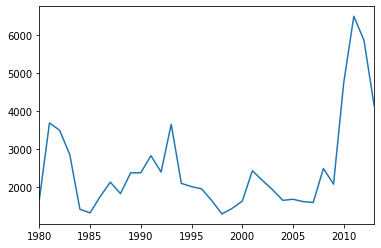

In [18]:
haiti.plot()

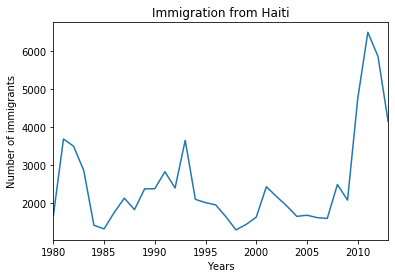

In [19]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel ('Number of immigrants')
plt.xlabel ('Years')

plt.show()

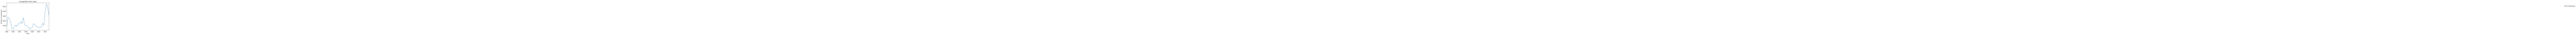

In [20]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel ('Number of immigrants')
plt.xlabel ('Years')

plt.text(2000, 6000, '2010 Earthquake')

plt.show()

In [21]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [22]:
df_CI = China_India.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


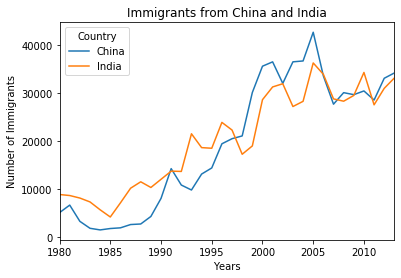

In [23]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

In [24]:
mpl.style.use(['ggplot'])

In [25]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [26]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [27]:
df_top5=df_can.head()

In [28]:
df_top5 = df_top5[years].transpose()

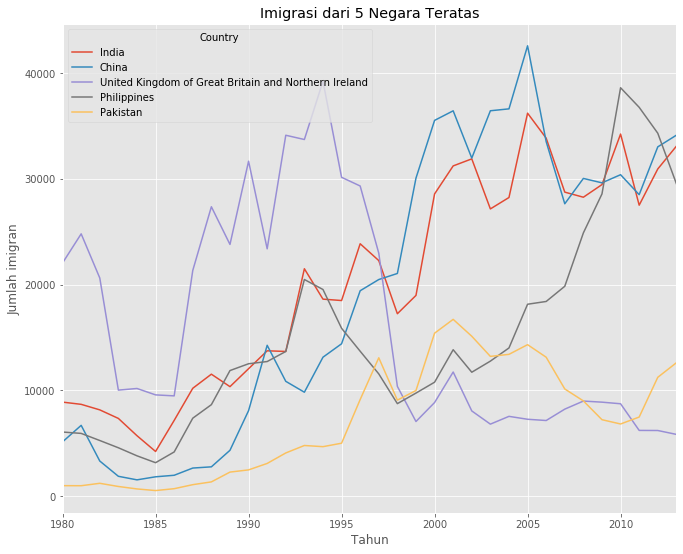

In [29]:
df_top5.plot(kind='line', figsize=(11, 9))

plt.title('Imigrasi dari 5 Negara Teratas')
plt.ylabel ('Jumlah imigran')
plt.xlabel ('Tahun')

plt.show()

## Area Plot

In [30]:
df_top5.index = df_top5.index.map(int)

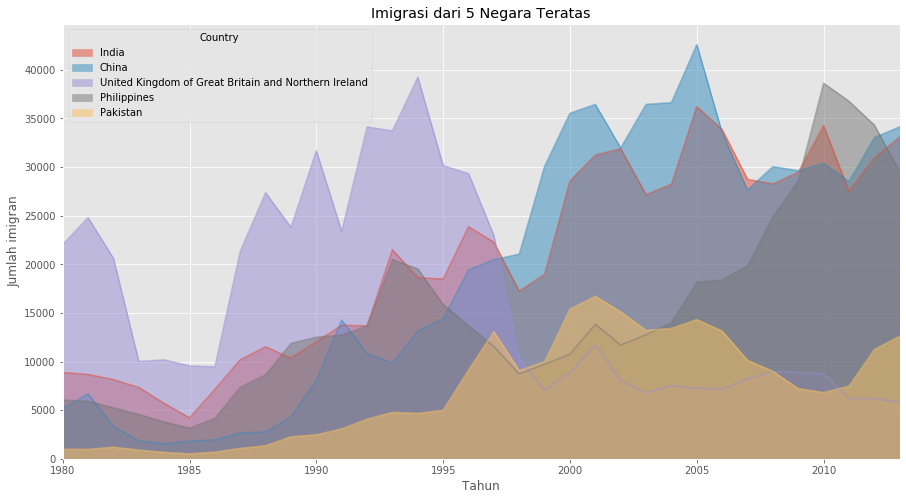

In [31]:
df_top5.plot(kind='area', figsize=(15,8), stacked=False)
plt.title('Imigrasi dari 5 Negara Teratas')
plt.ylabel ('Jumlah imigran')
plt.xlabel ('Tahun')

plt.show()

Text(0.5, 0, 'Years')

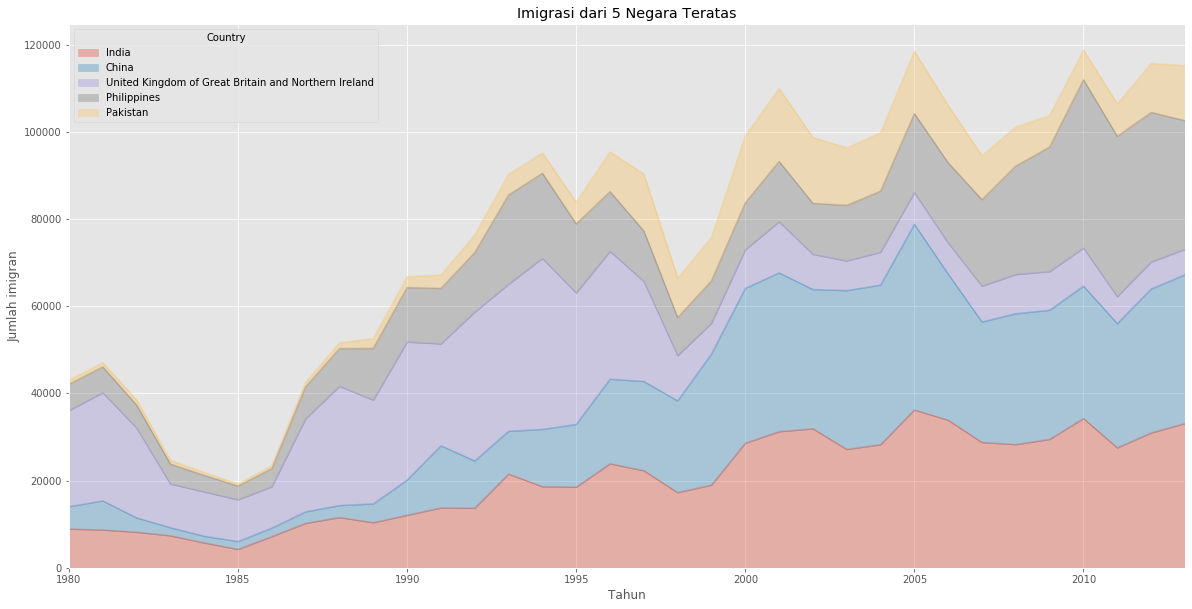

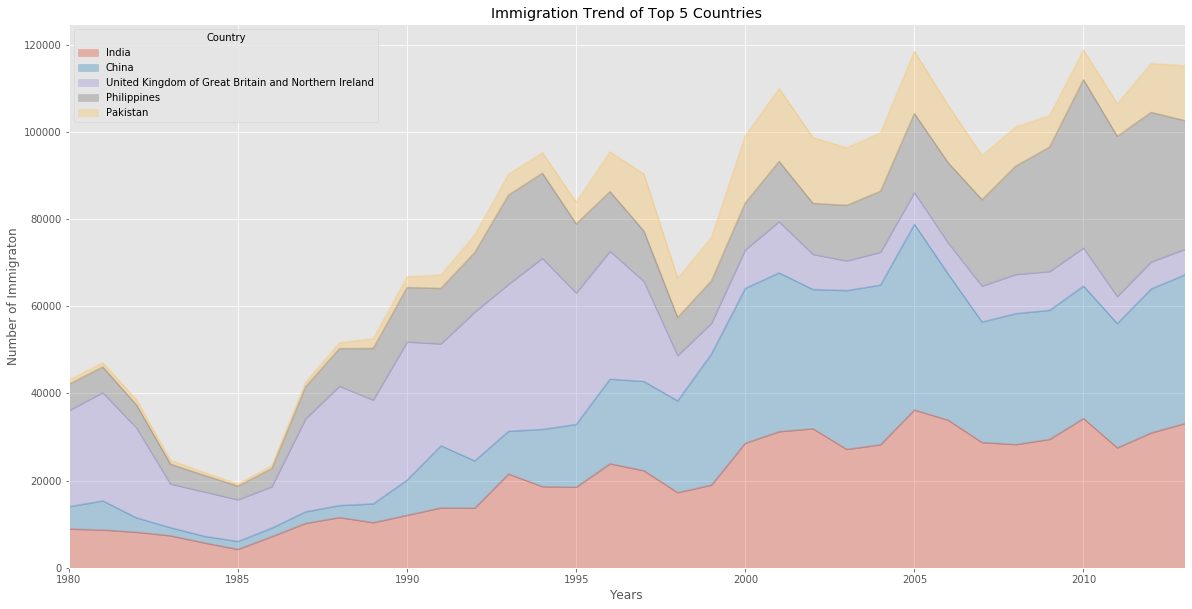

In [32]:
## Scripting layer (procedural method)

# Option 1: This is what we have been using si far
df_top5.plot (kind='area', alpha=0.35, figsize=(20,10))
    
plt.title('Imigrasi dari 5 Negara Teratas')
plt.ylabel ('Jumlah imigran')
plt.xlabel ('Tahun')
    
#Artist layer (Object oriented method)

ax= df_top5.plot(kind='area', alpha=0.35, figsize=(20,10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigraton')
ax.set_xlabel ('Years')

In [33]:
df_least5 = df_can.tail(5)

In [34]:
df_least5 = df_least5[years].transpose()

Text(0.5, 0, 'Tahun')

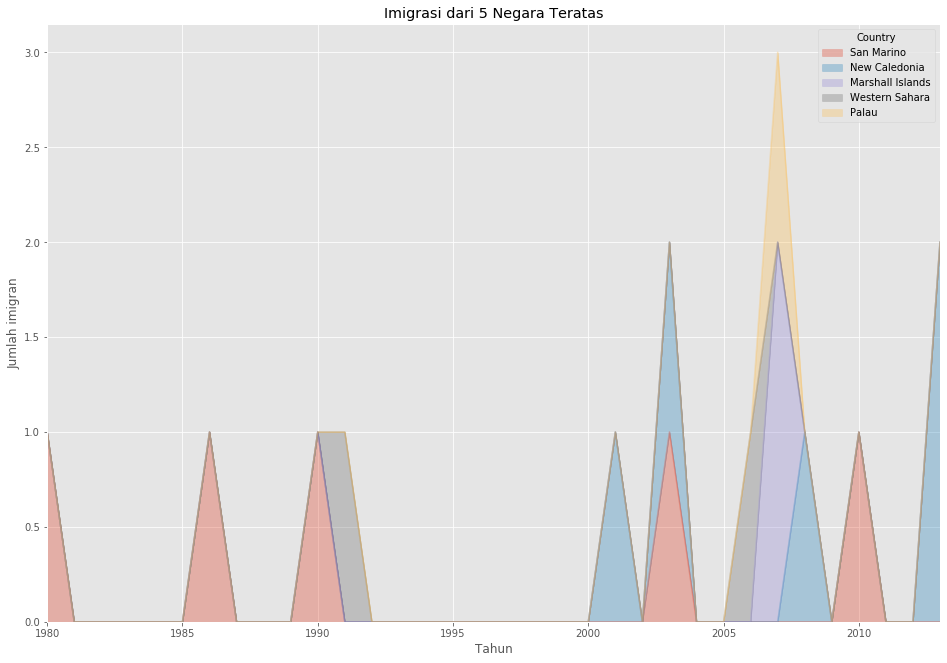

In [35]:
df_least5.plot(kind='area', alpha=0.35, figsize=(16,11))

plt.title('Imigrasi dari 5 Negara Teratas')
plt.ylabel ('Jumlah imigran')
plt.xlabel ('Tahun')

## Histograms

In [36]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [37]:
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


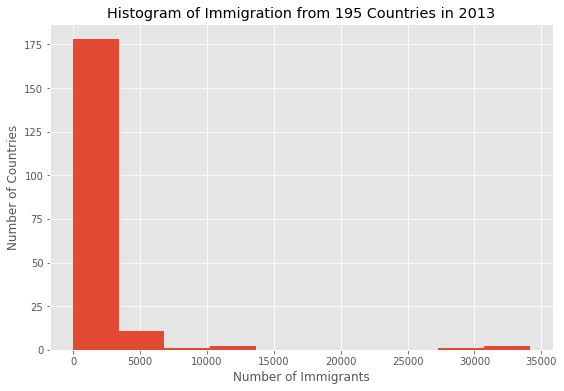

In [38]:
df_can['2013'].plot(kind='hist', figsize=(9,6))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

In [39]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


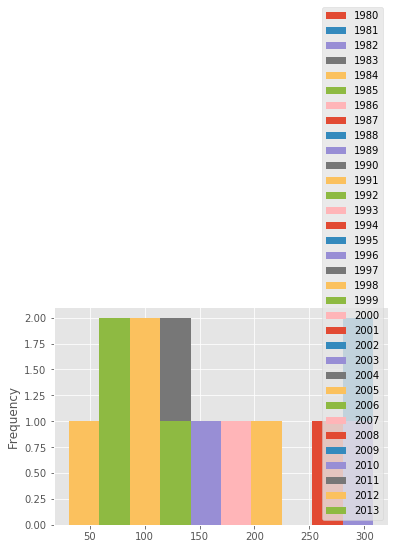

In [40]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [41]:
df_t=df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


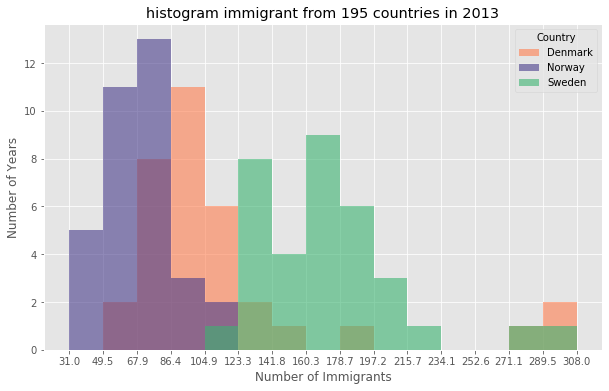

In [42]:
count, bin_edges = np.histogram(df_t, 15)
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('histogram immigrant from 195 countries in 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

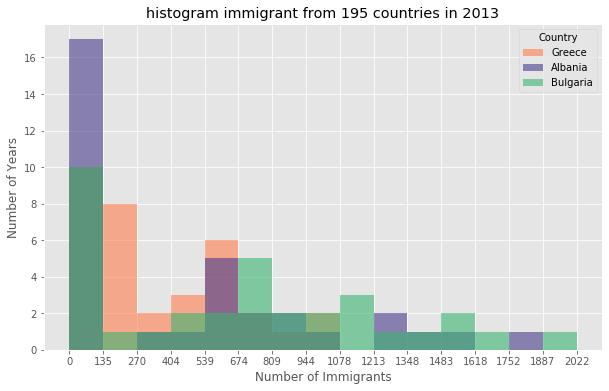

In [43]:
df_cof =df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof =df_cof.transpose()

count, bin_edges = np.histogram(df_cof, 15)
df_cof.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('histogram immigrant from 195 countries in 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Chart

In [44]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

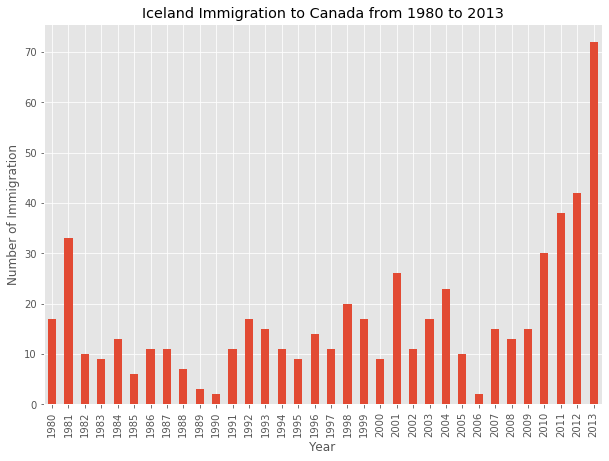

In [45]:
df_iceland.plot(kind='bar', figsize=(10,7))

plt.title('Iceland Immigration to Canada from 1980 to 2013')
plt.ylabel('Number of Immigration')
plt.xlabel('Year')

plt.show()

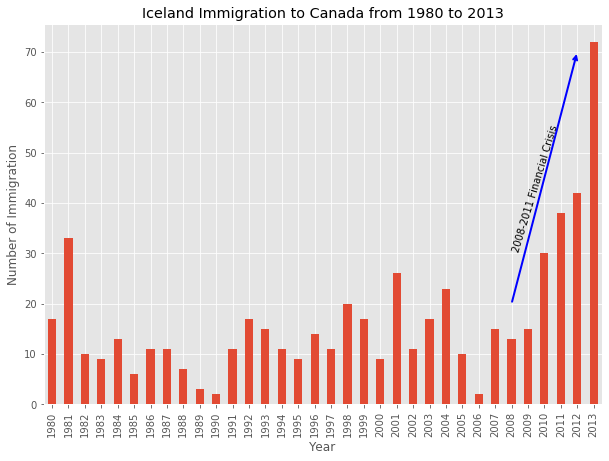

In [46]:
df_iceland.plot(kind='bar', figsize=(10,7))

plt.title('Iceland Immigration to Canada from 1980 to 2013')
plt.ylabel('Number of Immigration')
plt.xlabel('Year')

plt.annotate('',
            xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict (arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.annotate('2008-2011 Financial Crisis', 
            xy=(28, 30),
            rotation=73,
            va='bottom',
             ha='left'
             
            )
plt.show()

In [47]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

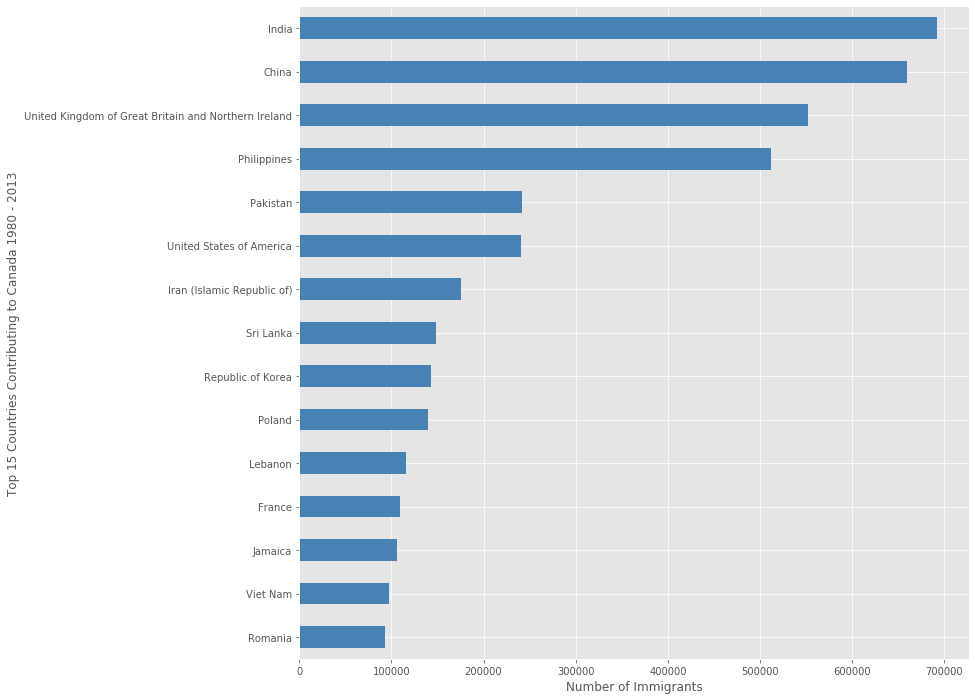

In [48]:
df_top15.plot(kind='barh', figsize=(12,12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.ylabel('Top 15 Countries Contributing to Canada 1980 - 2013')

plt.show()

## Pie Chart

In [49]:
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


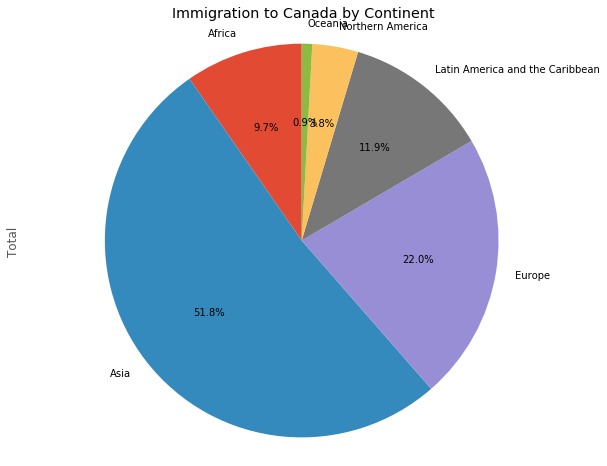

In [50]:
df_continents['Total'].plot(kind='pie',
                           figsize =(10,8),
                            startangle=90,
                            autopct='%1.1f%%'
                           )

plt.title('Immigration to Canada by Continent')
plt.axis('equal')

plt.show()

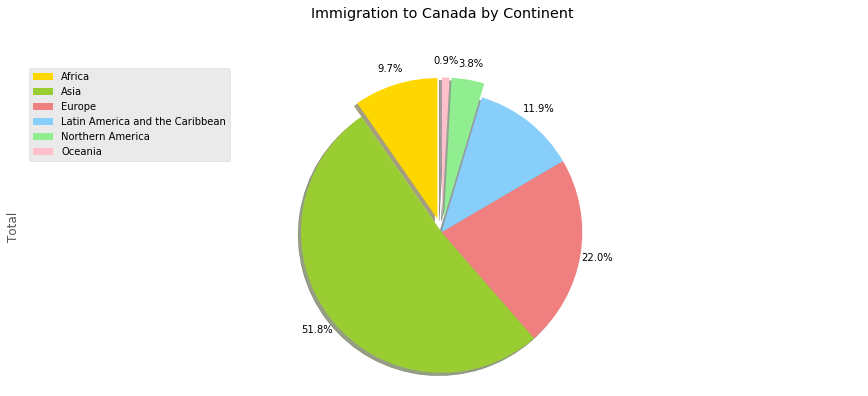

In [51]:
colors_list = ['gold', 'yellowgreen', 'lightcoral','lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                           figsize =(15,6),
                            startangle=90,
                            autopct='%1.1f%%',
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                           )

plt.title('Immigration to Canada by Continent', y=1.12)
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

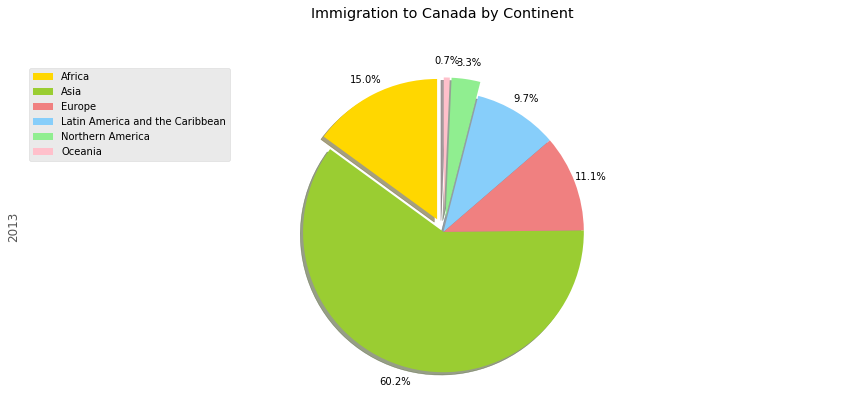

In [52]:
colors_list = ['gold', 'yellowgreen', 'lightcoral','lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['2013'].plot(kind='pie',
                           figsize =(15,6),
                            startangle=90,
                            autopct='%1.1f%%',
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                           )
plt.title('Immigration to Canada by Continent', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

## Box Plot

In [53]:
df_japan = df_can.loc[['Japan'], years].transpose()

In [54]:
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


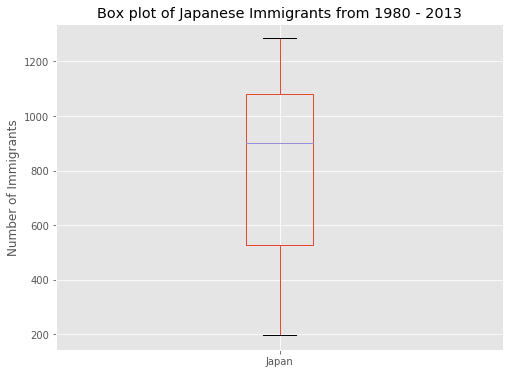

In [55]:
df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [56]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [57]:
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [58]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


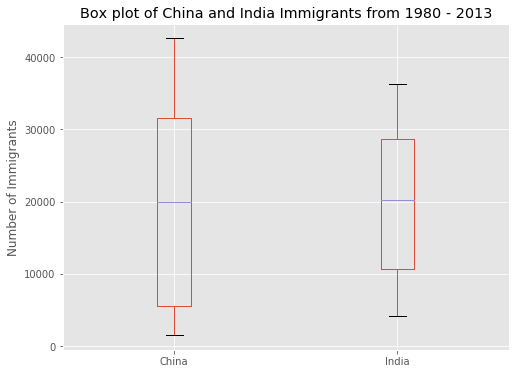

In [59]:
df_CI.plot(kind='box', figsize=(8,6))

plt.title ('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

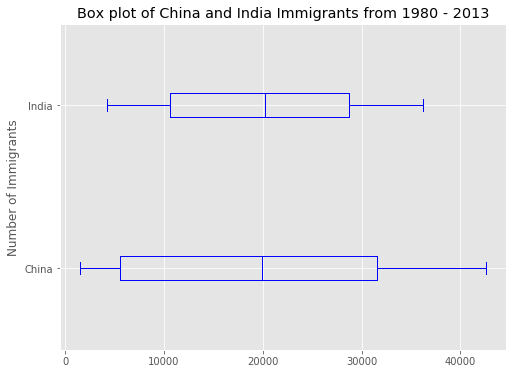

In [60]:
df_CI.plot(kind='box', figsize=(8,6), color='blue', vert=False)

plt.title ('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

## Scatter Plots

In [61]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


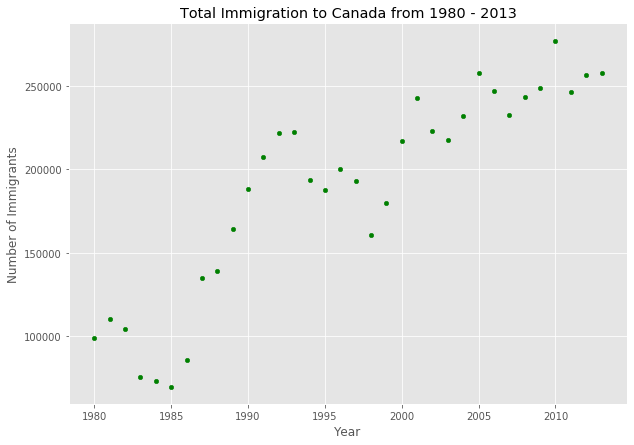

In [62]:
df_tot.plot(kind='scatter', x='year', y='total', figsize = (10,7), color='green')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [63]:
x =df_tot['year']
y =df_tot['total']

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

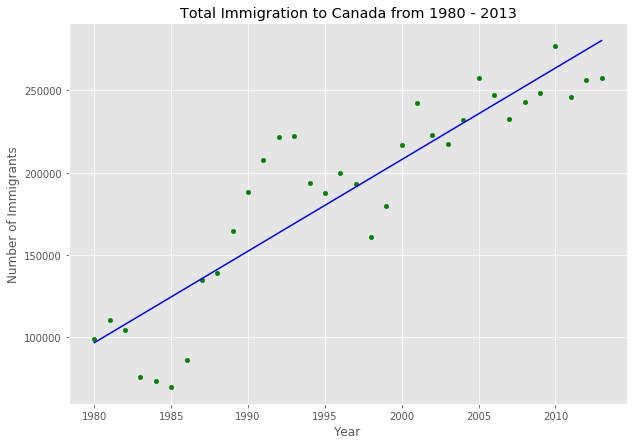

'No. Immigrants = 5567 * year + -10926195'

In [64]:
df_tot.plot(kind='scatter', x='year', y='total', figsize = (10,7), color='green')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='blue')

plt.show()

'No. Immigrants = {0:.0f} * year + {1:.0f}'.format(fit[0], fit[1])

In [65]:
5567 * 2015 - 10926195

291310

In [66]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


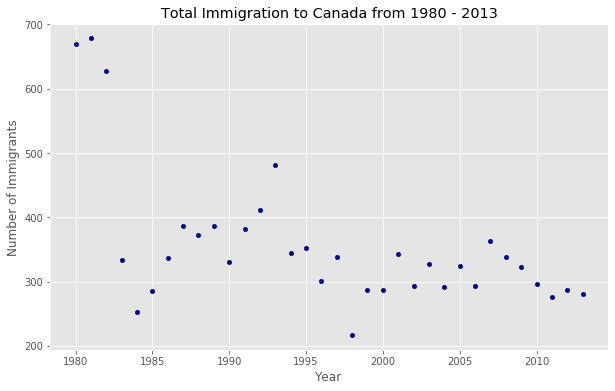

In [67]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


## Word Clouds

In [68]:
!pip install wordcloud

In [69]:
#bit.ly/PTP-8-Data

from wordcloud import WordCloud, STOPWORDS

In [70]:
alice_novel = open('alice_novel.txt', 'r').read()

In [71]:
stopwords = set (STOPWORDS)

In [72]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords

)

alice_wc.generate(alice_novel)

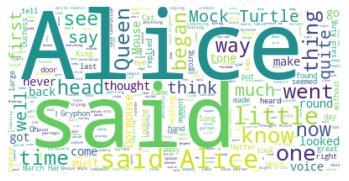

In [73]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

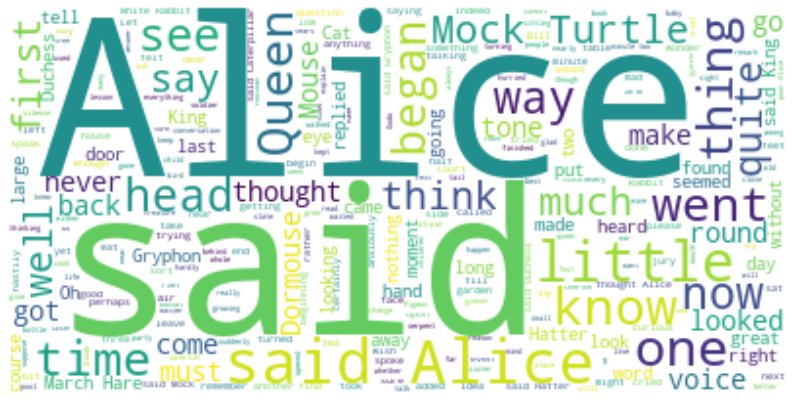

In [74]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

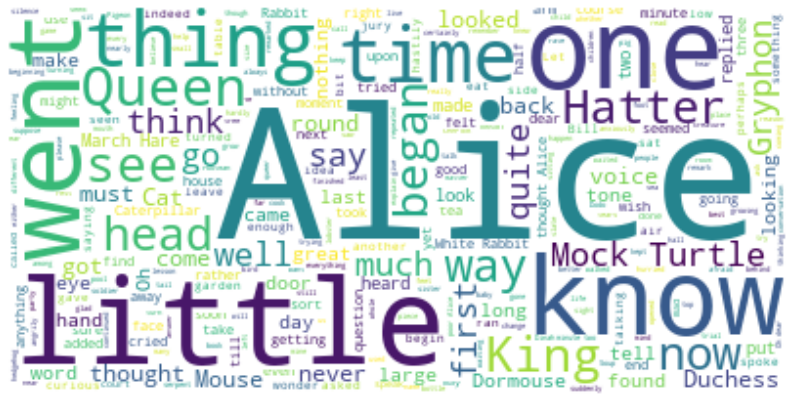

In [75]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plot

In [76]:
!pip install seaborn

import seaborn as sns

In [77]:
df_tot = pd.DataFrame(df_can[years].sum (axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


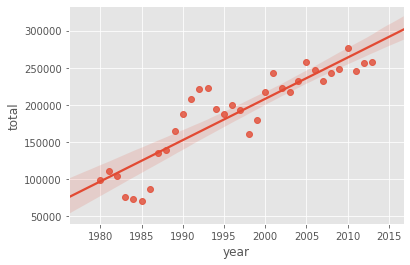

In [78]:
ax = sns.regplot(x='year', y='total', data=df_tot)

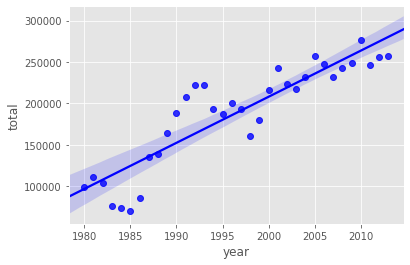

In [79]:
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'blue')

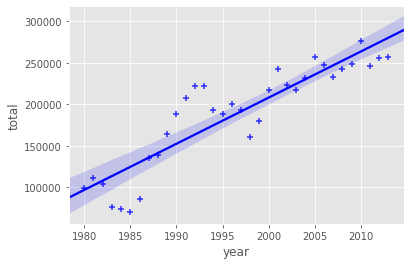

In [80]:
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'blue', marker='+')

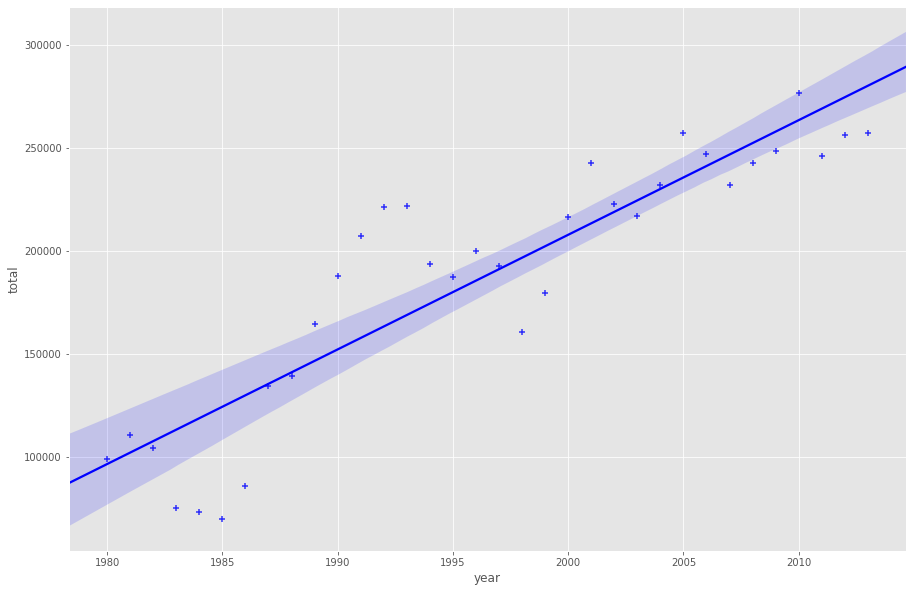

In [81]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

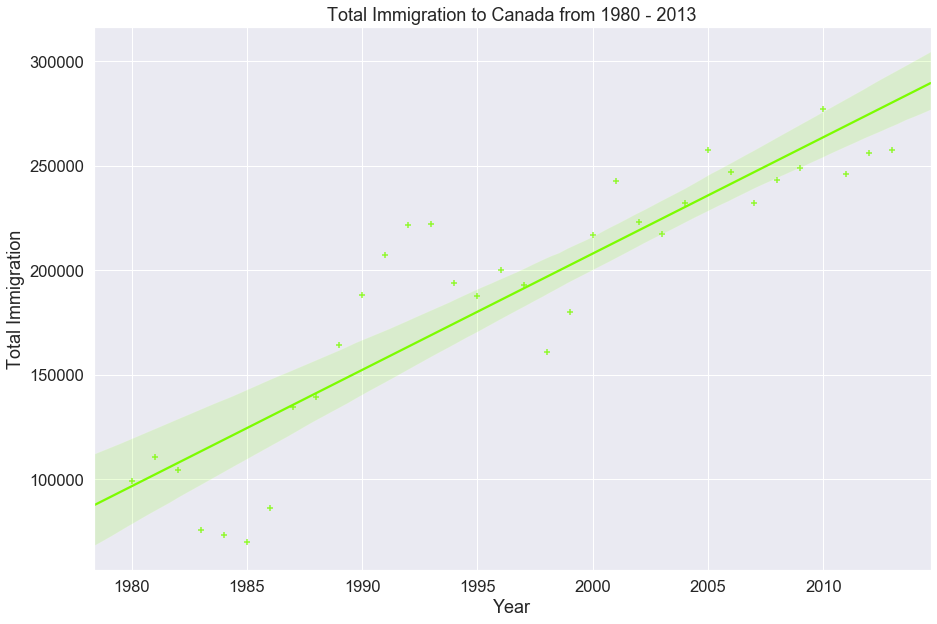

In [82]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='lawngreen', marker='+')

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

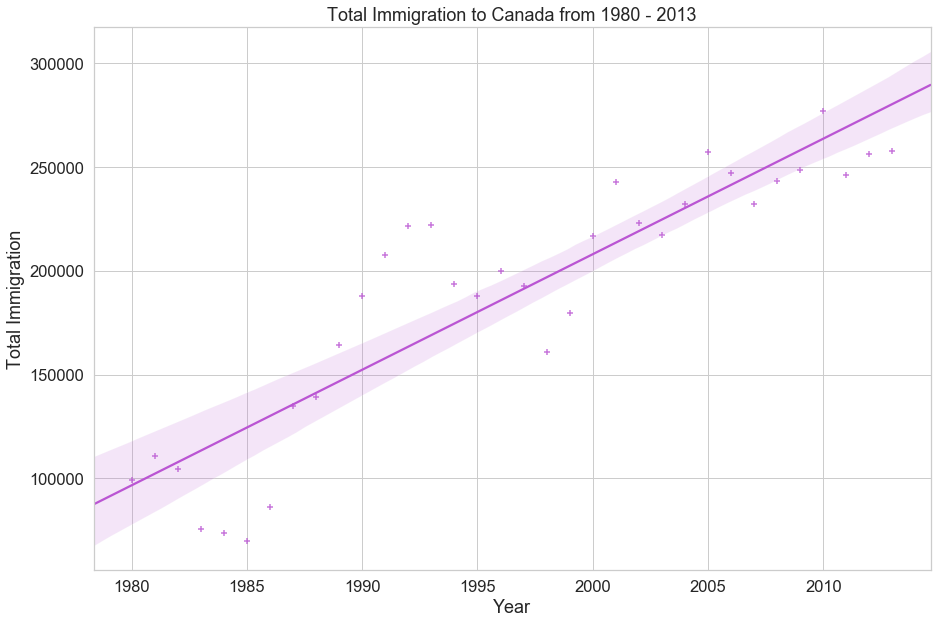

In [83]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='mediumorchid', marker='+')

ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

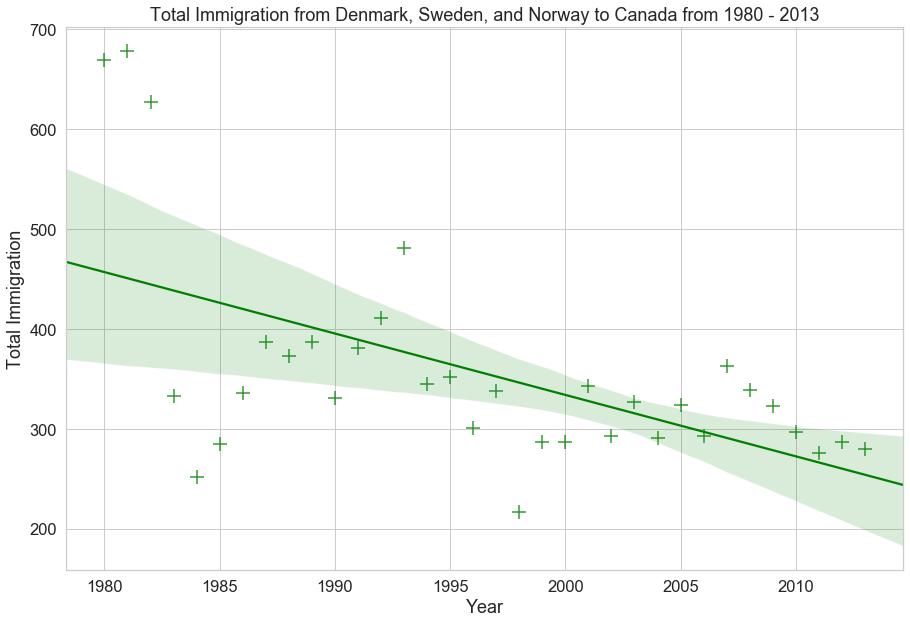

In [84]:
#create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

#create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

#reset index in place
df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total ['year'].astype(int)

plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

#generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

In [85]:
!pip install folium

## Maps

In [86]:
import folium

In [87]:
world_map = folium.Map()

In [88]:
world_map

In [89]:
world_map = folium.Map(location=[-6.2607187,106.755352], zoom_start=15)

world_map

In [90]:
world_map = folium.Map(location=[-6.3034631,106.780887], zoom_start=18, tiles='Stamen Toner')

world_map

In [91]:
df_incidents = pd.read_csv ('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [92]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [93]:
df_incidents.shape

(150500, 13)

In [94]:
latitude = 37.77
longtitude = -122.42

In [95]:
sanfran_map = folium.Map(location=[latitude, longtitude], zoom_start=12)

sanfran_map

In [ ]:
incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity='0.6'
    )
    
)
    
sanfran_map.add_child(incidents)

In [ ]:
# incidents = folium.map.FeatureGroup()
from folium import plugins

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
    folium.Marker(
        location=[lat, lng],
        popup=label,
        icon=None,
        
    ).add_to(incidents)
    
)
    
sanfran_map

In [ ]:
df_can.reset_index(inplace=True)
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd'
    fill_opacity=0,7,
    line_opacity=0,2,
    legend_name='Immigration to Canada'


)